In [9]:

# Import data and modules
import pandas as pd
import numpy as np

# To be able to import from other notebook
!pip3 install nbimporter
import nbimporter
from extraction import extract_data

# To show all data in dataframe
pd.set_option('display.max_colwidth', None)
# Set higher DPI for graphs
plt.rcParams['figure.dpi'] = 150

raw = pd.read_json("data/kym.json")  # meme templates from Know Your Meme, 16 features
events = pd.read_json("data/events.json")  # memes with timestamps from origin and spread
memes = extract_data(raw, events)

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Found 12654 memes matching these criteria.


In [34]:
# Making a screenshot for the thesis
pd.set_option('display.max_colwidth', 18)
raw.head(5)
for c in raw['content']:
    print(len(str(c)))
    break

5992


In [ ]:
events.head()

,title,origin,spread
0,This is Relevant To My Interests,"[[2005-10-21T00:00:00, October 21st, 2005, was posted]]","[[2006-09-18T00:00:00, September 18th, 2006, an entry for "" Relevant to my Interests was created], [2006-11-16T00:00:00, November 16th, 2006, Flickr user "" the boy on his bike uploaded a LOLcat image macro featuring a photograph of a cat sitting at what looks like a console with the caption], [2007-01-11T00:00:00, January 11th, 2007, the original cat image macro was reposted], [2008-06-30T00:00:00, June 30th, 2008, Urban Dictionary user Fablic Kurac submitted a definition for "" RTMI ""], [2008-07-11T00:00:00, July 11th, 2008, I published an image macro of a cat], [2009-11-15T00:00:00, November 15th, 2009, a Facebook page titled "" Joining Pages That Are Relevant to my Interests was created], [2011-10-08T00:00:00, October 8th, 2011, the "" Relevant2MyInterests "" Tumblr blog was launched], [2012-06-18T00:00:00, June 18th, 2012, the Internet humor site Memebase posted a Bear Grylls image ( shown below , right ) with the title], [2012-07-10T00:00:00, July 10th, 2012, the user deleted their account since], [2021-12-01T00:00:00, December 1st, a t - shirt with the original cat image macro ( shown below , left ) was released]]"
1,ROFLcopter,"[[2004-01-11T00:00:00, January 11th, 2004, the earliest known use of the term was posted]]","[[2004-03-30T00:00:00, March 30th, 2004, the single - serving site Roflcopter.com was registered], [2005-09-01T00:00:00, September of 2005, a ROFLcopter flash game in which the player could control an ASCII ROFLcopter to shoot down enemies on screen was released], [2006-07-10T00:00:00, July 10th, 2006, a post was submitted], [2007-05-06T00:00:00, May 6th, 2007, YouTube netprince uploaded a video of the ASCII GIF], [2008-08-04T00:00:00, August 4th, 2008, a video titled "" ROFLcopter : was uploaded], [2009-09-02T00:00:00, September 2nd, 2009, YouTuber charlestrippy posted a video titled "" ROFLCopter "" featuring a remote - controlled helicopter with the note "" ROFL "" attached to it ( shown right )], [2010-03-14T00:00:00, March 14th, 2010, was uploaded], [2012-03-17T00:00:00, March 17th, 2012, Redditor occupyfacebook submitted a post titled "" ROFLcopter "" , which included a photo of a woman with a helicopter hairstyle ( shown right )]]"
2,Bitches Don't Know,"[[2004-01-01T00:00:00, 2004, "" Bitches Know], [2006-02-24T00:00:00, February 24th, 2006, Davezilla.com linked]]",[]
3,Leave Britney Alone,"[[2007-01-01T00:00:00, 2007, Chris made a fake emotional storm], [2007-09-10T00:00:00, September 10, 2007, Chris Crocker uploaded a monologue performance , in which he made a plea to the media and the general public to cease hounding pop star Britney Spears ( copy shown below )], [2012-03-26T00:00:00, March 26, 2012, The video gained over 2 million views]]",[]
4,O RLY?,"[[2001-02-17T00:00:00, February 17th, 2001, Snowy Owl image macro used a photo taken by], [2003-01-01T00:00:00, 2003, originates], [2003-08-20T00:00:00, August 20th, 2003, The earliest documented use of the phrase be found]]","[[2004-10-20T00:00:00, October 20th, 2004, An isolated instance of "" O RLY "" image macro featuring Jack Bauer from the TV series 24 was posted]]"


In [3]:
# Status distribution
status_dict = {}
c = 0
for d in memes['details']:
    if 'status' in d.keys():
        status = d['status']
        if status in status_dict.keys():
            status_dict[status] += 1
        else:
            status_dict[status] = 1
            
print("Status distribution:", status_dict)

Status distribution: {'confirmed': 3266, 'deadpool': 4478, 'submission': 4908, 'unlisted': 2}


In [4]:
# Collecting most important verbs in events (timestamps)
verbs = ["posted", "linked", "coined", "submitted", "made", "taken", "is", "was", "recorded", "uploaded", "began", "released", "created", "appeared", "used", "begun", "began", "launched", "featured"]
count = {key:0 for key in verbs}
for stamplist in memes["origin"]:
    for stamp in stamplist:
        for verb in verbs:
            if verb in stamp[2]:
                count[verb] += 1
                
print("Verb frequency:", dict(sorted(count.items(), key=lambda item: item[1], reverse=True)))

Verb frequency: {'was': 3196, 'is': 2491, 'posted': 1165, 'uploaded': 1141, 'released': 630, 'began': 464, 'submitted': 452, 'created': 378, 'appeared': 236, 'launched': 222, 'used': 211, 'made': 158, 'featured': 145, 'taken': 115, 'coined': 63, 'recorded': 45, 'linked': 8, 'begun': 6}


# Visualizations

In [5]:
from matplotlib import pyplot as plt
from collections import Counter
from ast import literal_eval
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,12)
large_fontsize = 35
medium_fontsize = 25
small_fontsize = 15

# Colors used (green, blue, orange, gray)
hex1, hex2, hex3, hex4 = '#79ccb3', '#92cad1', '#e9724d', '#868686'

reaction = pd.read_csv("out/reaction.csv")
exploitable = pd.read_csv("out/exploitable.csv")
snowclone = pd.read_csv("out/snowclone.csv")

### About section word cloud

In [ ]:
#about_list = [about for about in memes['about']]
#with open("out/word_cloud.txt", "w") as f:
#    for about in about_list:
#        f.write(about + " ")

In [ ]:
# Count how many memes are missing origin
c = 0
for det in memes['details']:
    if 'origin' in det.keys() and len(det['origin']) > 0:
        pass
    else:
        c += 1
print("ORIGIN is missing for {} memes out of {}. Remember: some memes have multiple types.".format(c, len(memes)))

In [ ]:
# Count the median and avg number of types per meme
# Considering only memes that have type specified (very few)
lens = []
for t in memes['type']:
    if len(t) > 0:
        lens.append(len(t))
print(np.mean(lens))
print(np.median(lens))

In [ ]:
# Calculate average length of "About" section
about = [len(about.split(" ")) for about in memes['about']]
print(np.median(about))

### Distribution of TYPE

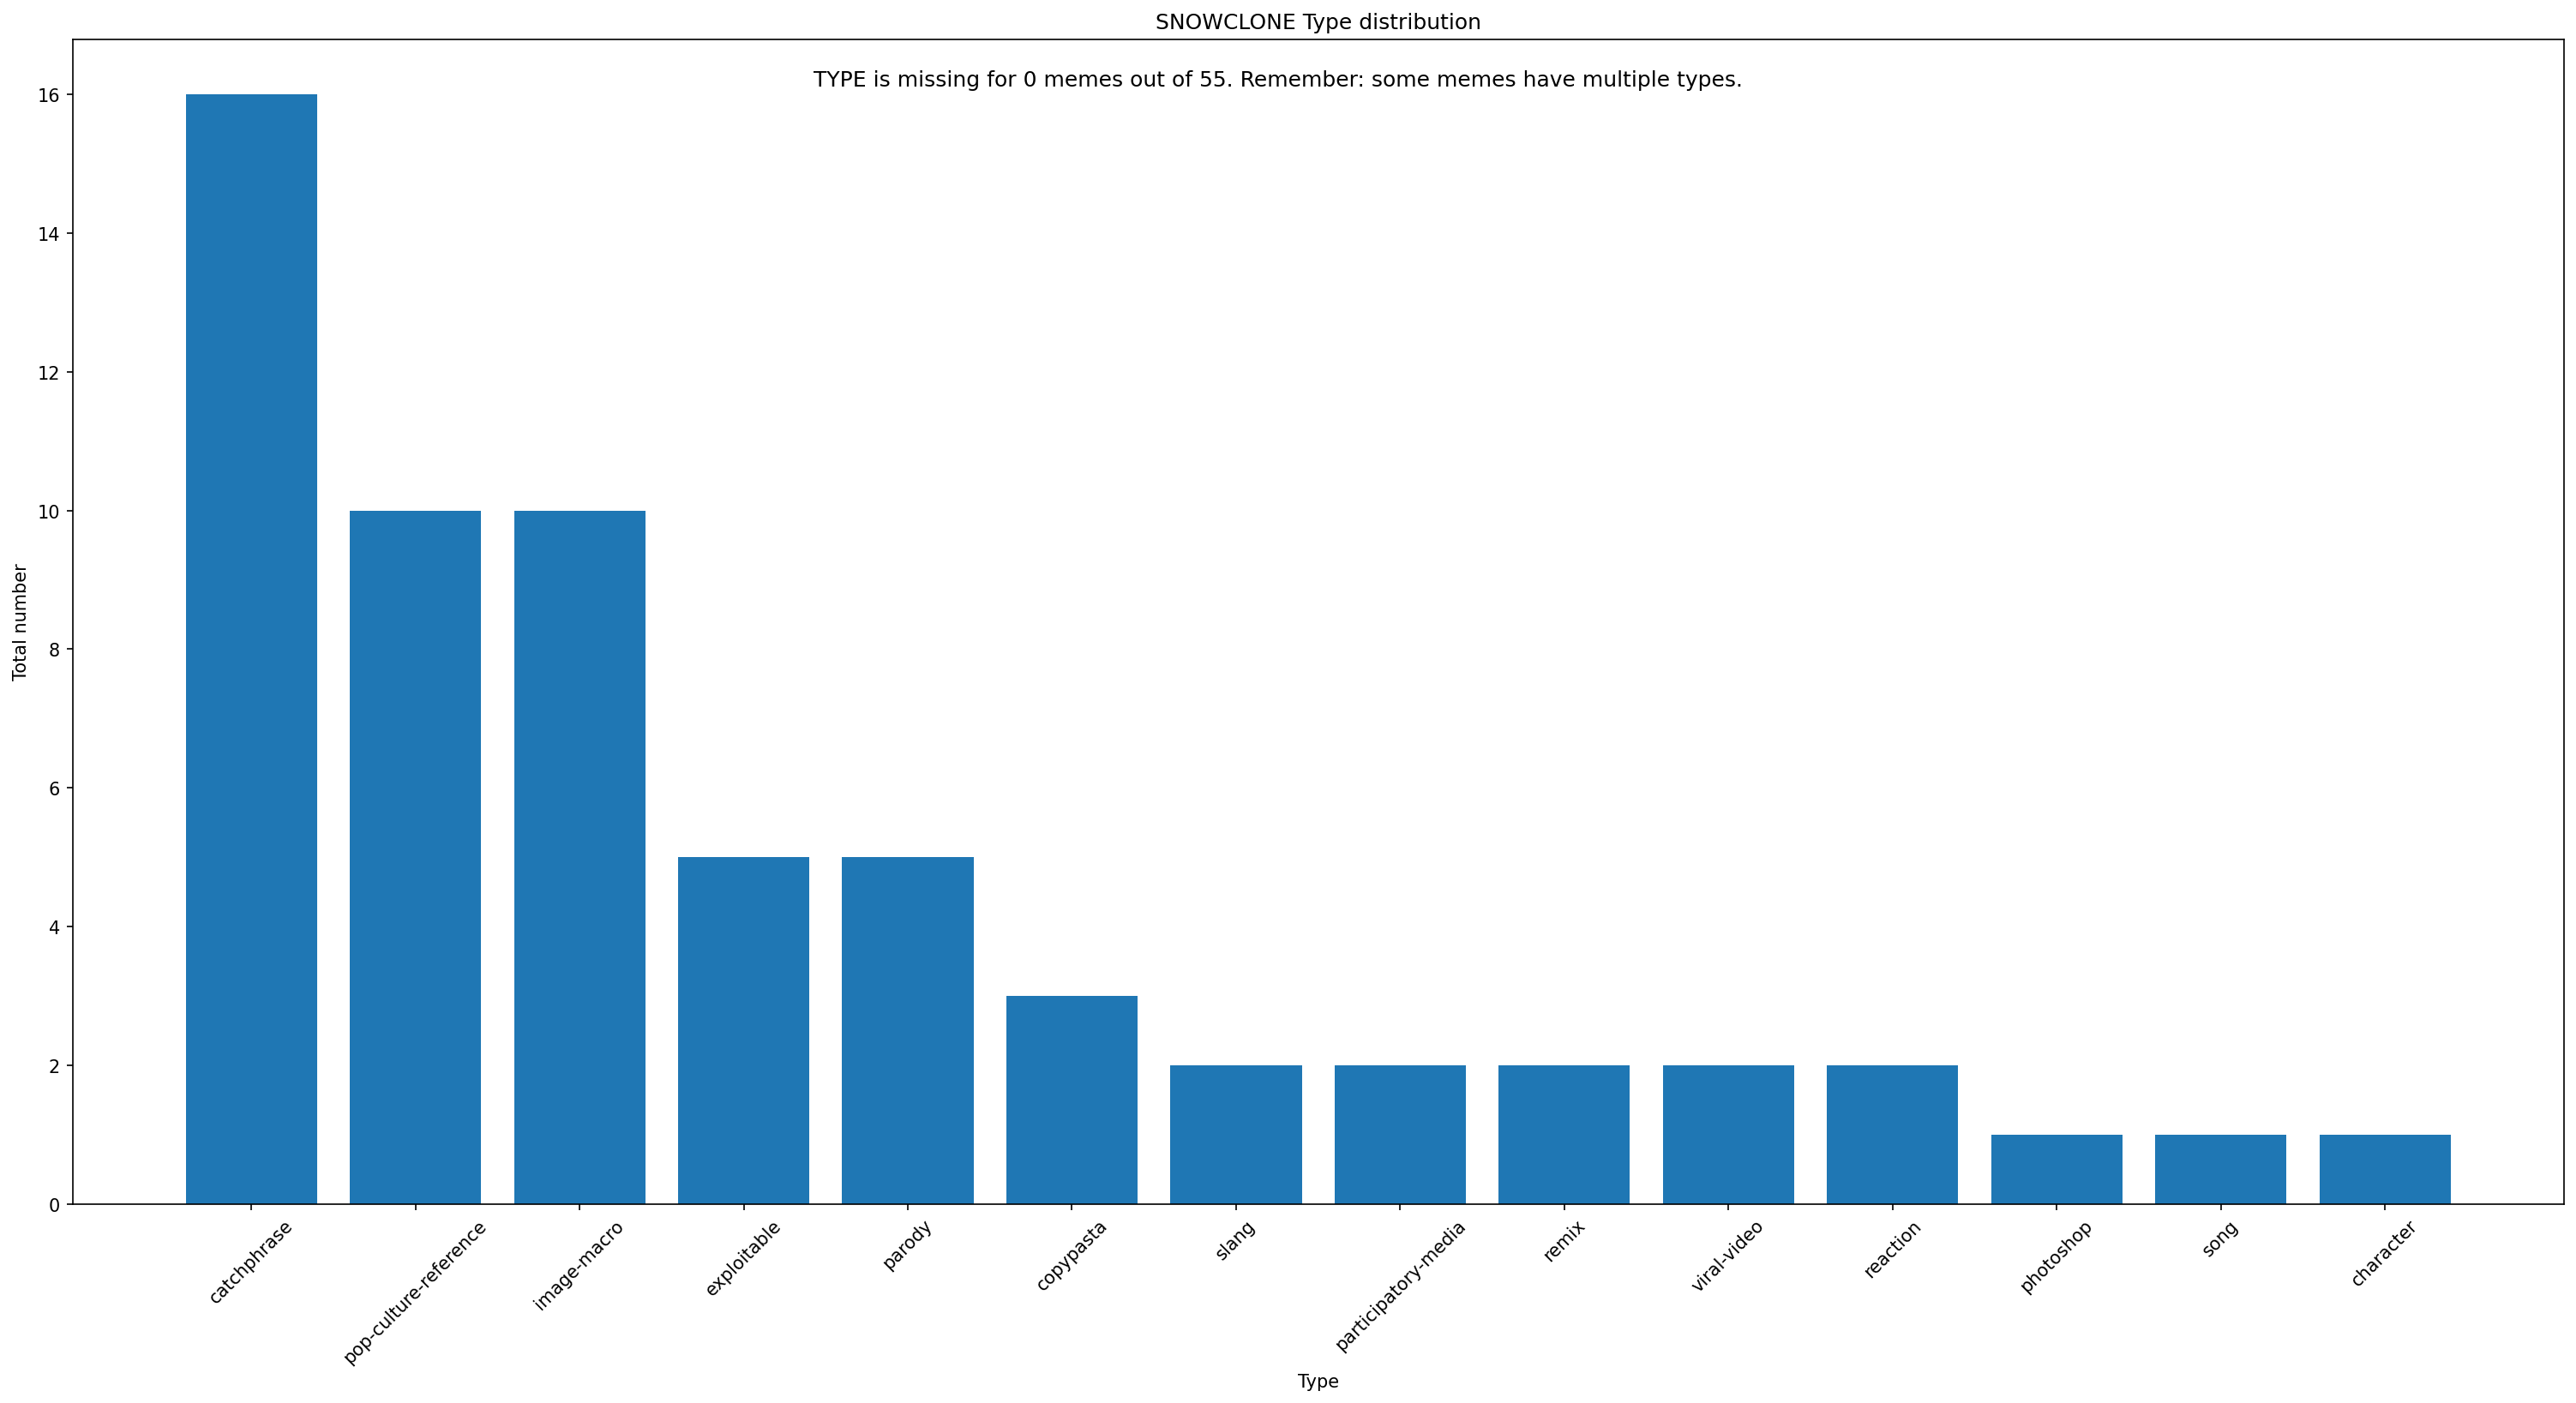

In [10]:
# Make frequency dictionary for ONE TYPE
data = snowclone

all_types = []
for typelist in data["other_types"]:
    for t in literal_eval(typelist):
        all_types.append(t)
type_freq = Counter(all_types)
text = "TYPE is missing for {} memes out of {}. Remember: some memes have multiple types."\
      .format(type_freq[''], len(data))

# Create bar plot
plot_data = dict(type_freq.most_common())
if "" in plot_data.keys():
    plot_data.pop("")
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Type')
plt.title("SNOWCLONE Type distribution")
plt.xticks(rotation = 45)
plt.figtext(0.5, 0.85, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/types.png')
plt.show()

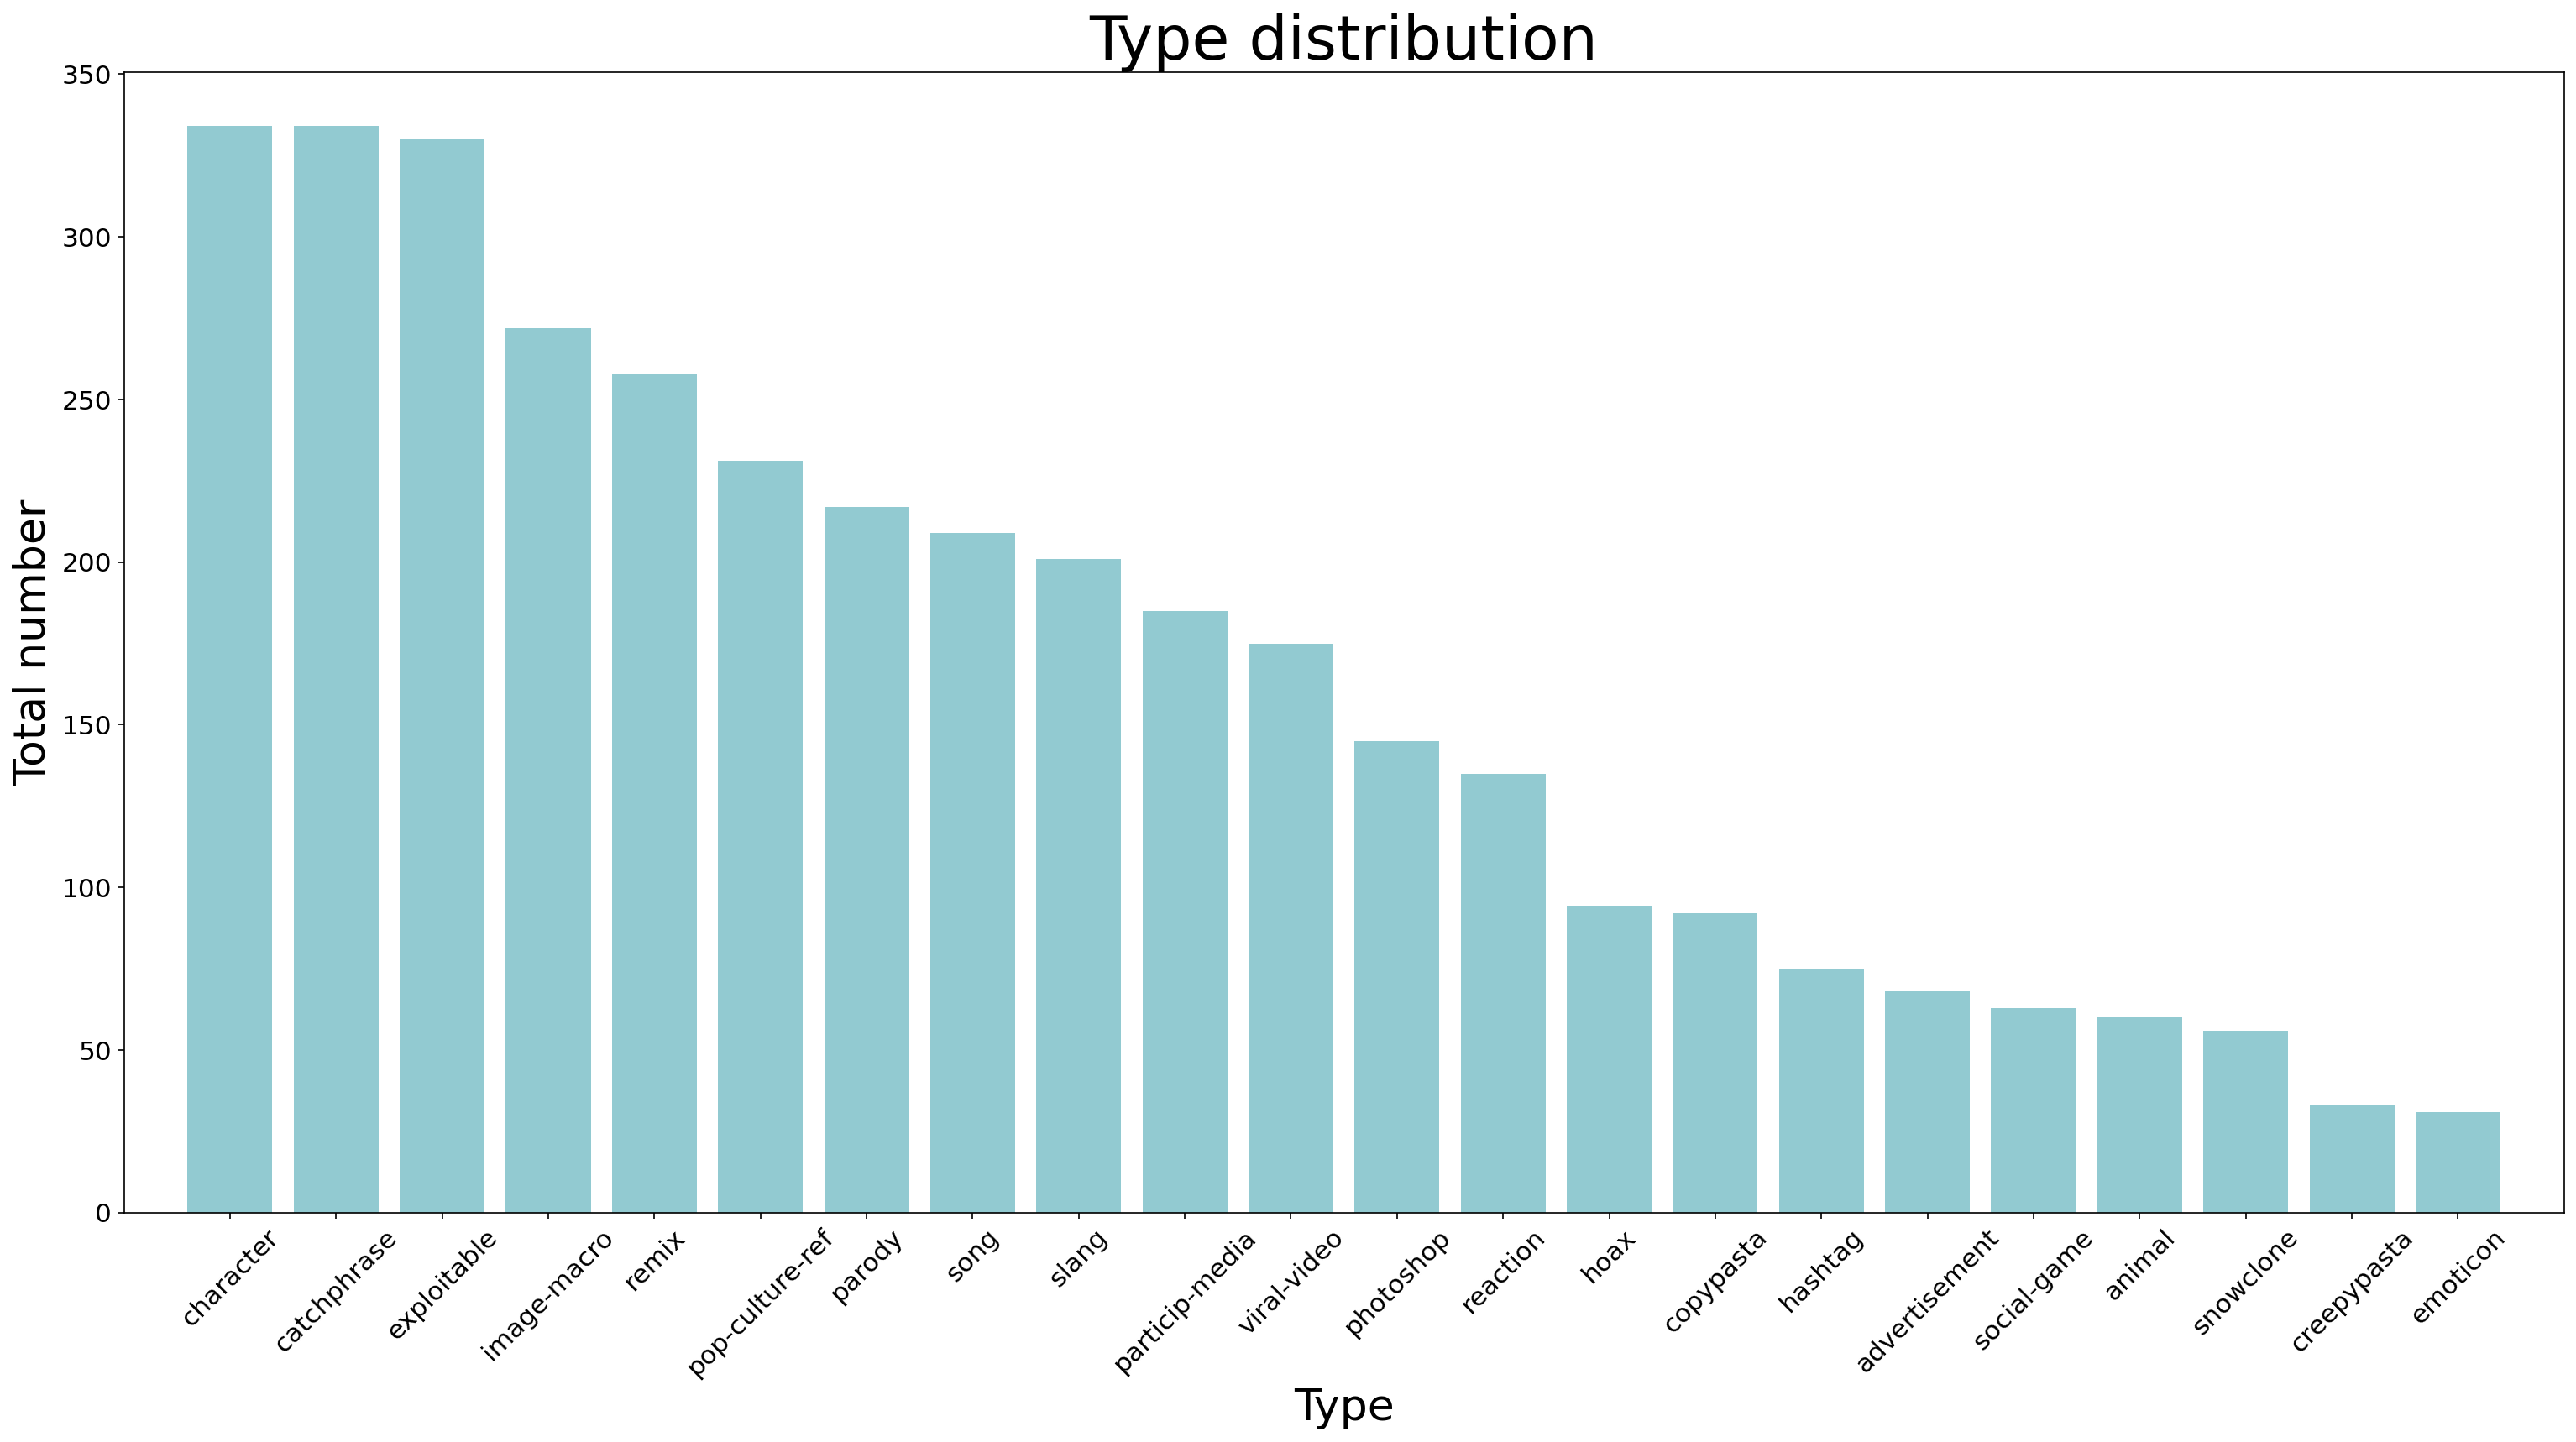

In [12]:
# Make frequency dictionary FOR ALL MEMES
data = memes

all_types = []
for typelist in data["type"]:
    if typelist == []:
        all_types.append("")
    for t in typelist:
        all_types.append(t)
        
type_freq = Counter(all_types)
text = "TYPE is missing for {} memes out of {}. Remember: some memes have multiple types."\
      .format(type_freq[''], len(data))
#plot_data['pop-culture-ref'] = plot_data.pop('pop-culture-reference')
type_freq['pop-culture-ref'] = type_freq['pop-culture-reference']
del type_freq['pop-culture-reference']
type_freq['particip-media'] = type_freq['participatory-media']
del type_freq['participatory-media']
type_freq['conspiracy'] = type_freq['conspiracy-theory']
del type_freq['conspiracy-theory']
type_freq['illusion'] = type_freq['optical-illusion']
del type_freq['optical-illusion']

# Create bar plot
plot_data = dict(type_freq.most_common())
plot_data = {str(key):val for key,val in plot_data.items() if int(val) >= 30}  # keep only items with at least 30 occurrences
if "" in plot_data.keys():
    plot_data.pop("")
plt.bar(plot_data.keys(), plot_data.values(), color=hex2)
plt.ylabel('Total number', fontsize=medium_fontsize)
plt.xlabel('Type', fontsize=medium_fontsize)
plt.title("Type distribution", fontsize=large_fontsize)
plt.xticks(rotation = 45, fontsize=small_fontsize)
plt.yticks(fontsize=small_fontsize)
plt.xlim([-1,len(plot_data.keys())])
# plt.figtext(0.5, 0.85, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/types.png', bbox_inches='tight')
plt.show()

### Distribution of YEAR

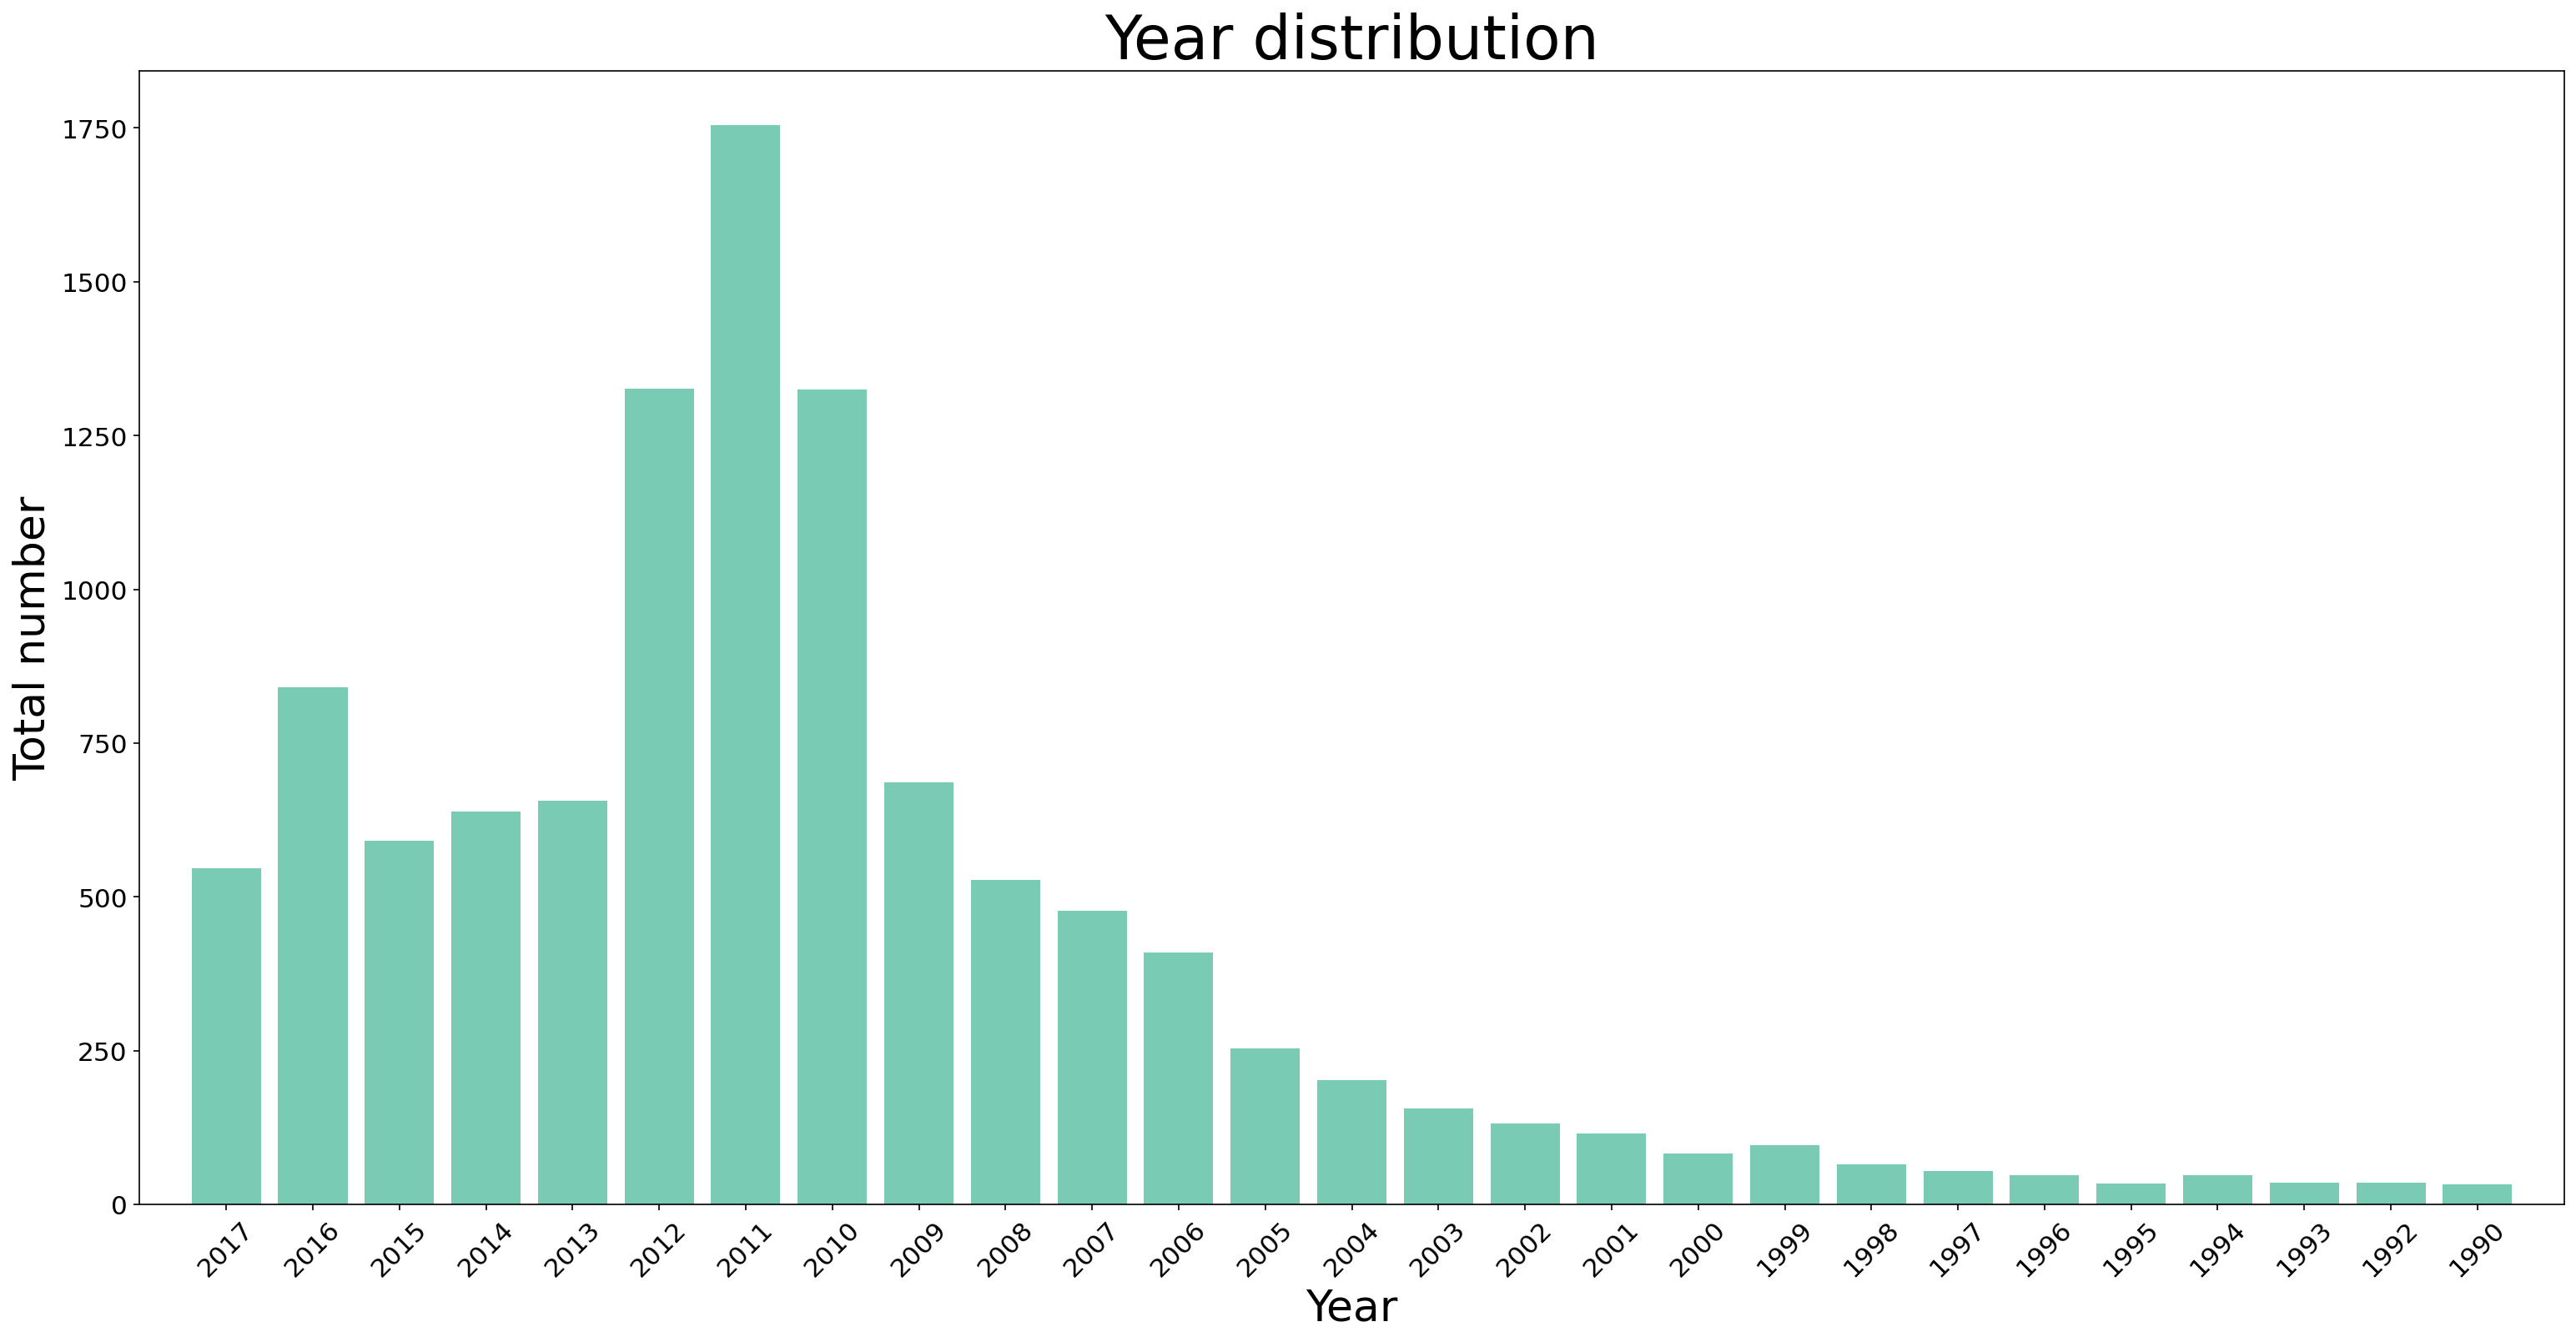

In [13]:
# Add year as separate column
year_col = []
missing_year = []
for title, d in zip(memes['title'], memes['details']):
    if 'year' in d.keys() and d['year'] != None:
        year_col.append(d['year'])
    else:
        year_col.append("")

memes['year'] = year_col

data = memes  # change this for specific types

year_freq = Counter(data['year'])
text = "YEAR is missing for {} memes out of {}."\
      .format(year_freq[''], len(data))


# Create bar plot
plot_data = dict(sorted(year_freq.items(), reverse=True))
plot_data = {str(key):val for key,val in plot_data.items() if int(val) >= 30}  # keep only items with at least 30 occurrences
plot_data = dict(sorted(plot_data.items(), reverse=True))
if "" in plot_data.keys():
    plot_data.pop("")
plt.bar(plot_data.keys(), plot_data.values(), color=hex1)
plt.ylabel('Total number', fontsize=medium_fontsize)
plt.xlabel('Year', fontsize=medium_fontsize)
plt.title("Year distribution", fontsize=large_fontsize)
plt.xticks(rotation = 45, fontsize=small_fontsize)
plt.yticks(fontsize=small_fontsize)
plt.xlim([-1,len(plot_data.keys())])
# plt.figtext(0.5, 0.05, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/years.png', bbox_inches='tight')
plt.show()

### Distribution of LAST_UPDATE_SOURCE

In [ ]:
# Extract only year from last_update

data = memes

last_update_col = []
for date in data["last_update_source"]:
    last_update_col.append(str(date)[:4])
data["last_update_source"] = last_update_col


update_freq = Counter(data["last_update_source"])
text = "LAST_UPDATE_SOURCE is missing for {} memes out of {}."\
      .format(update_freq[''], len(data))

# Create bar plot
plot_data = dict(sorted(update_freq.items(), reverse=True))
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Last_update year')
plt.title("SNOWCLONE Last_update distribution")
plt.xticks(rotation = 45)
plt.xlim([-1,len(plot_data.keys())])
plt.figtext(0.5, 0.05, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/last_update_source.png')
plt.show()

### Distribution of TAGS

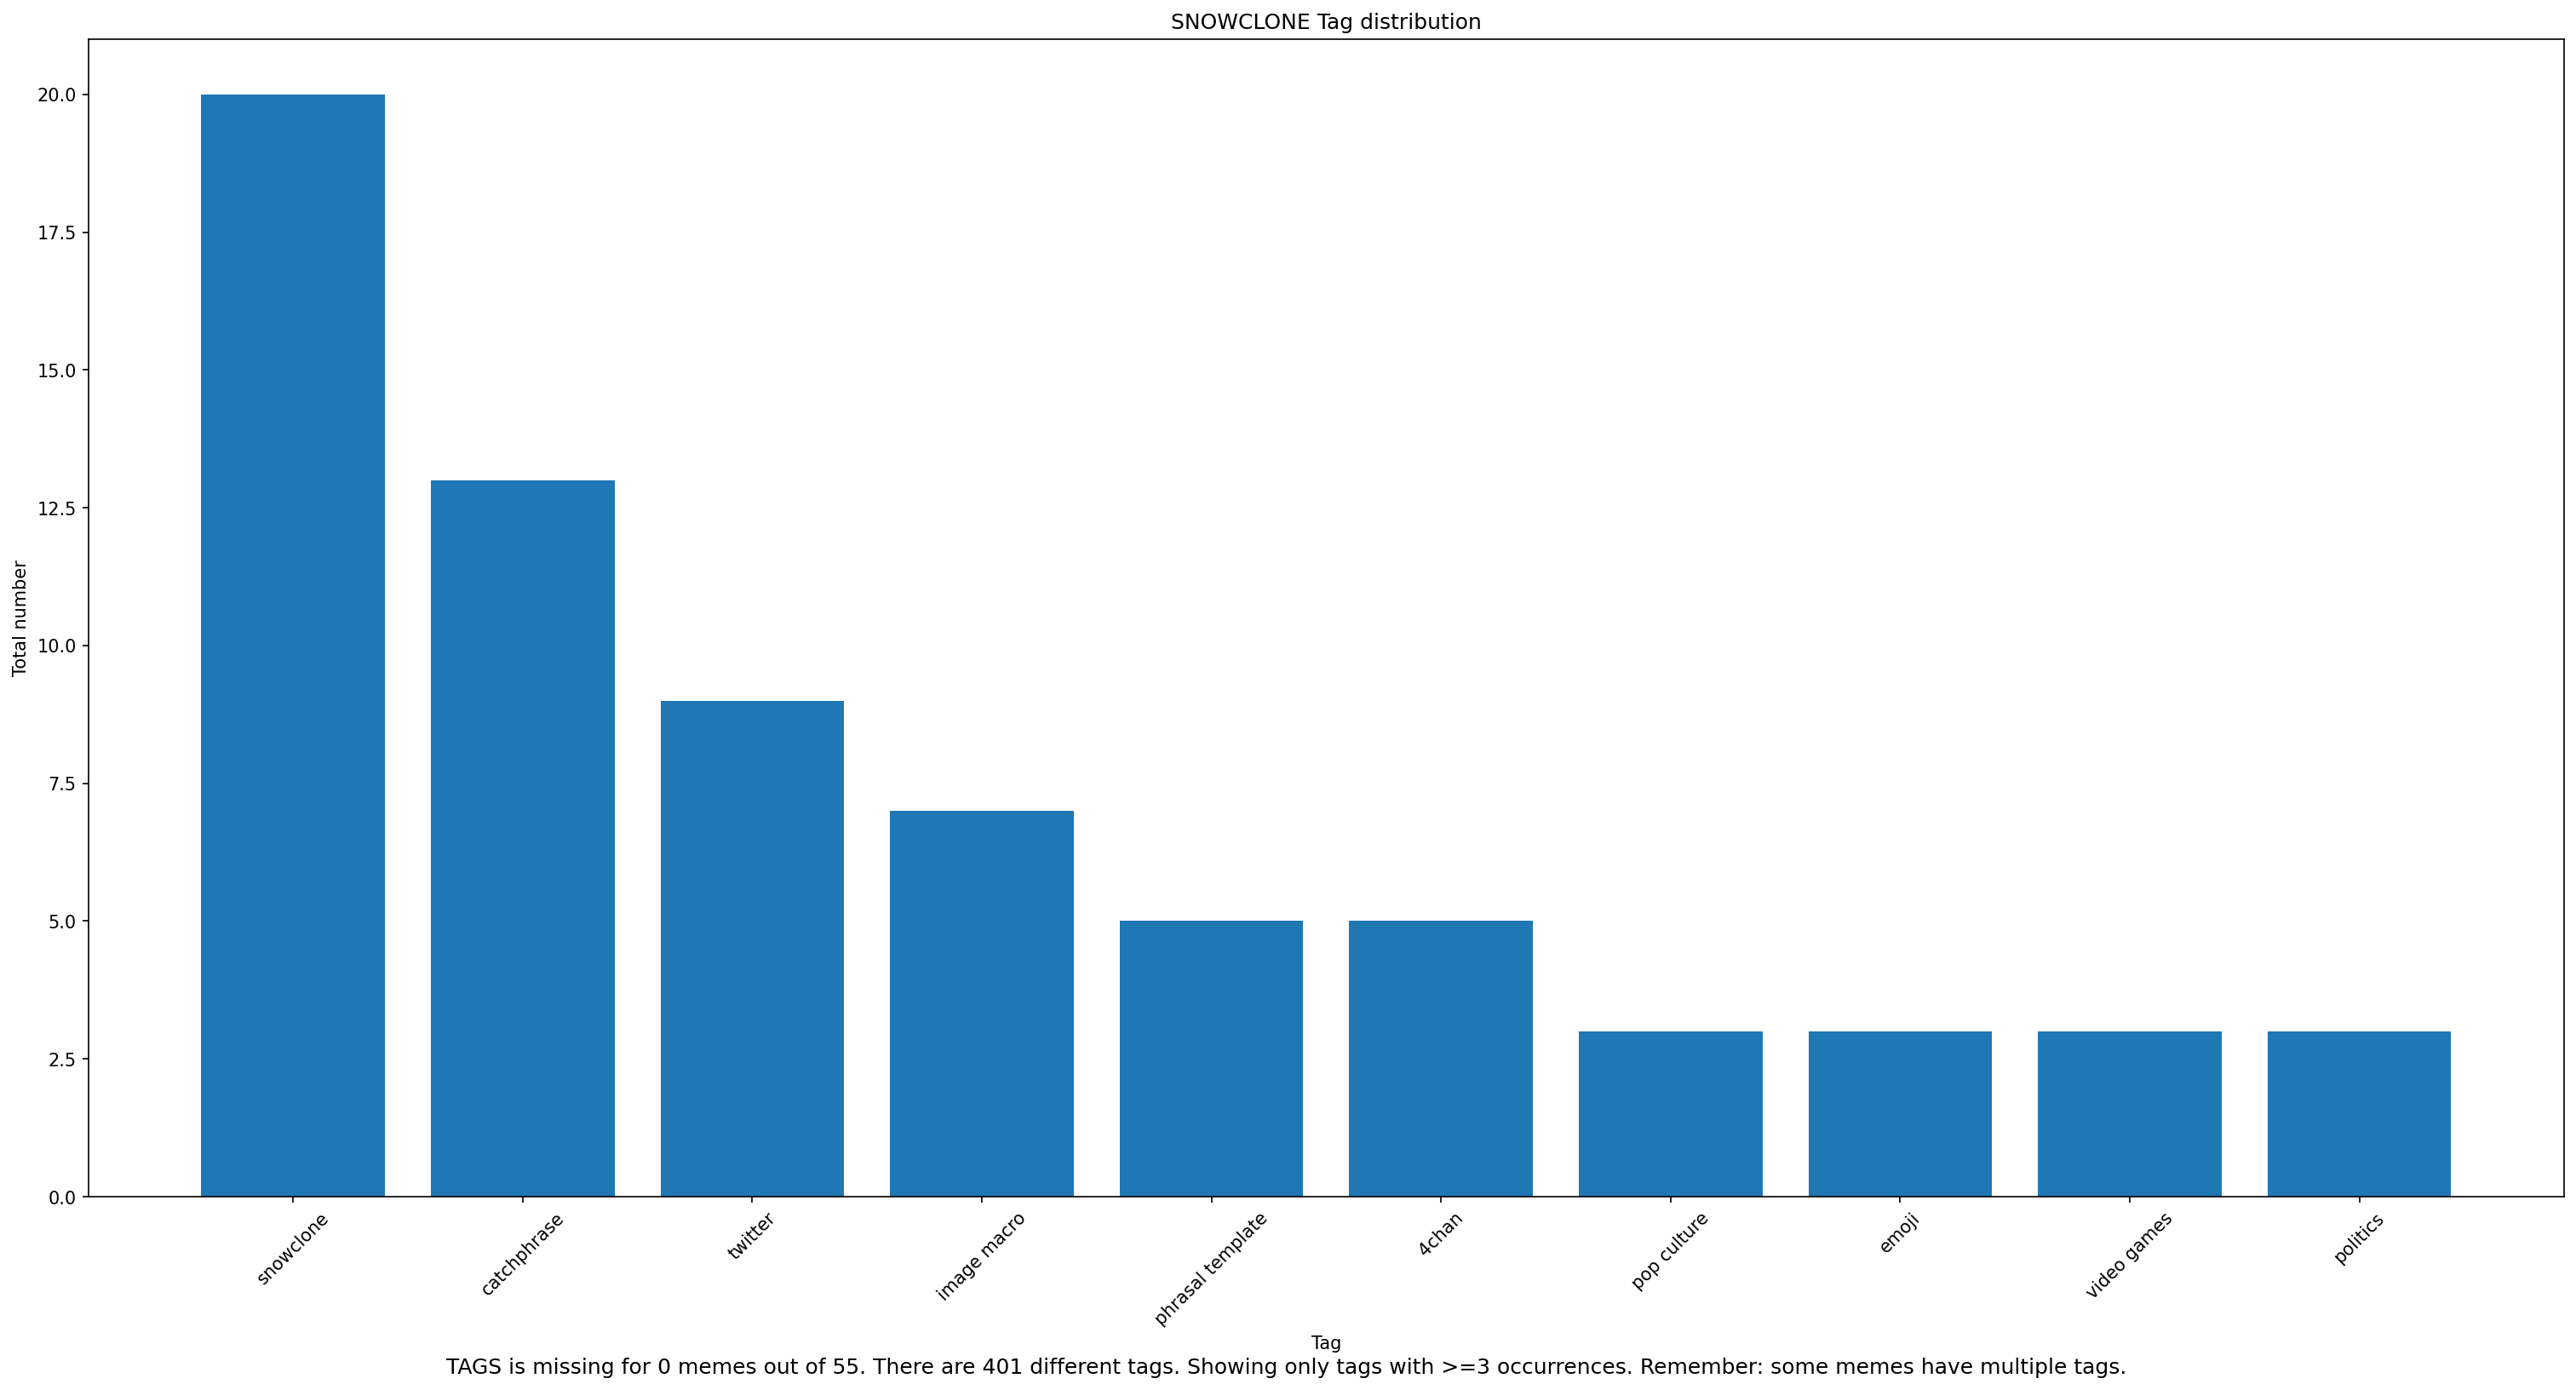

In [14]:
# Make frequency dictionary
data = snowclone

all_tags = []
missing = 0
for taglist in data["tags"]:
    for t in literal_eval(taglist):
        all_tags.append(t)
    if len(literal_eval(taglist)) == 0:
        missing += 1
        
tags_freq = Counter(all_tags)
text = "TAGS is missing for {} memes out of {}. There are {} different tags. Showing only tags with >=3 occurrences. Remember: some memes have multiple tags."\
      .format(missing, len(data), len(tags_freq))


# Create bar plot
plot_data = dict(tags_freq.most_common())
plot_data = {key:value for key,value in plot_data.items() if value >= 3}
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Tag')
plt.title("SNOWCLONE Tag distribution")
plt.xticks(rotation = 45)
plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/tags.png')
plt.show()

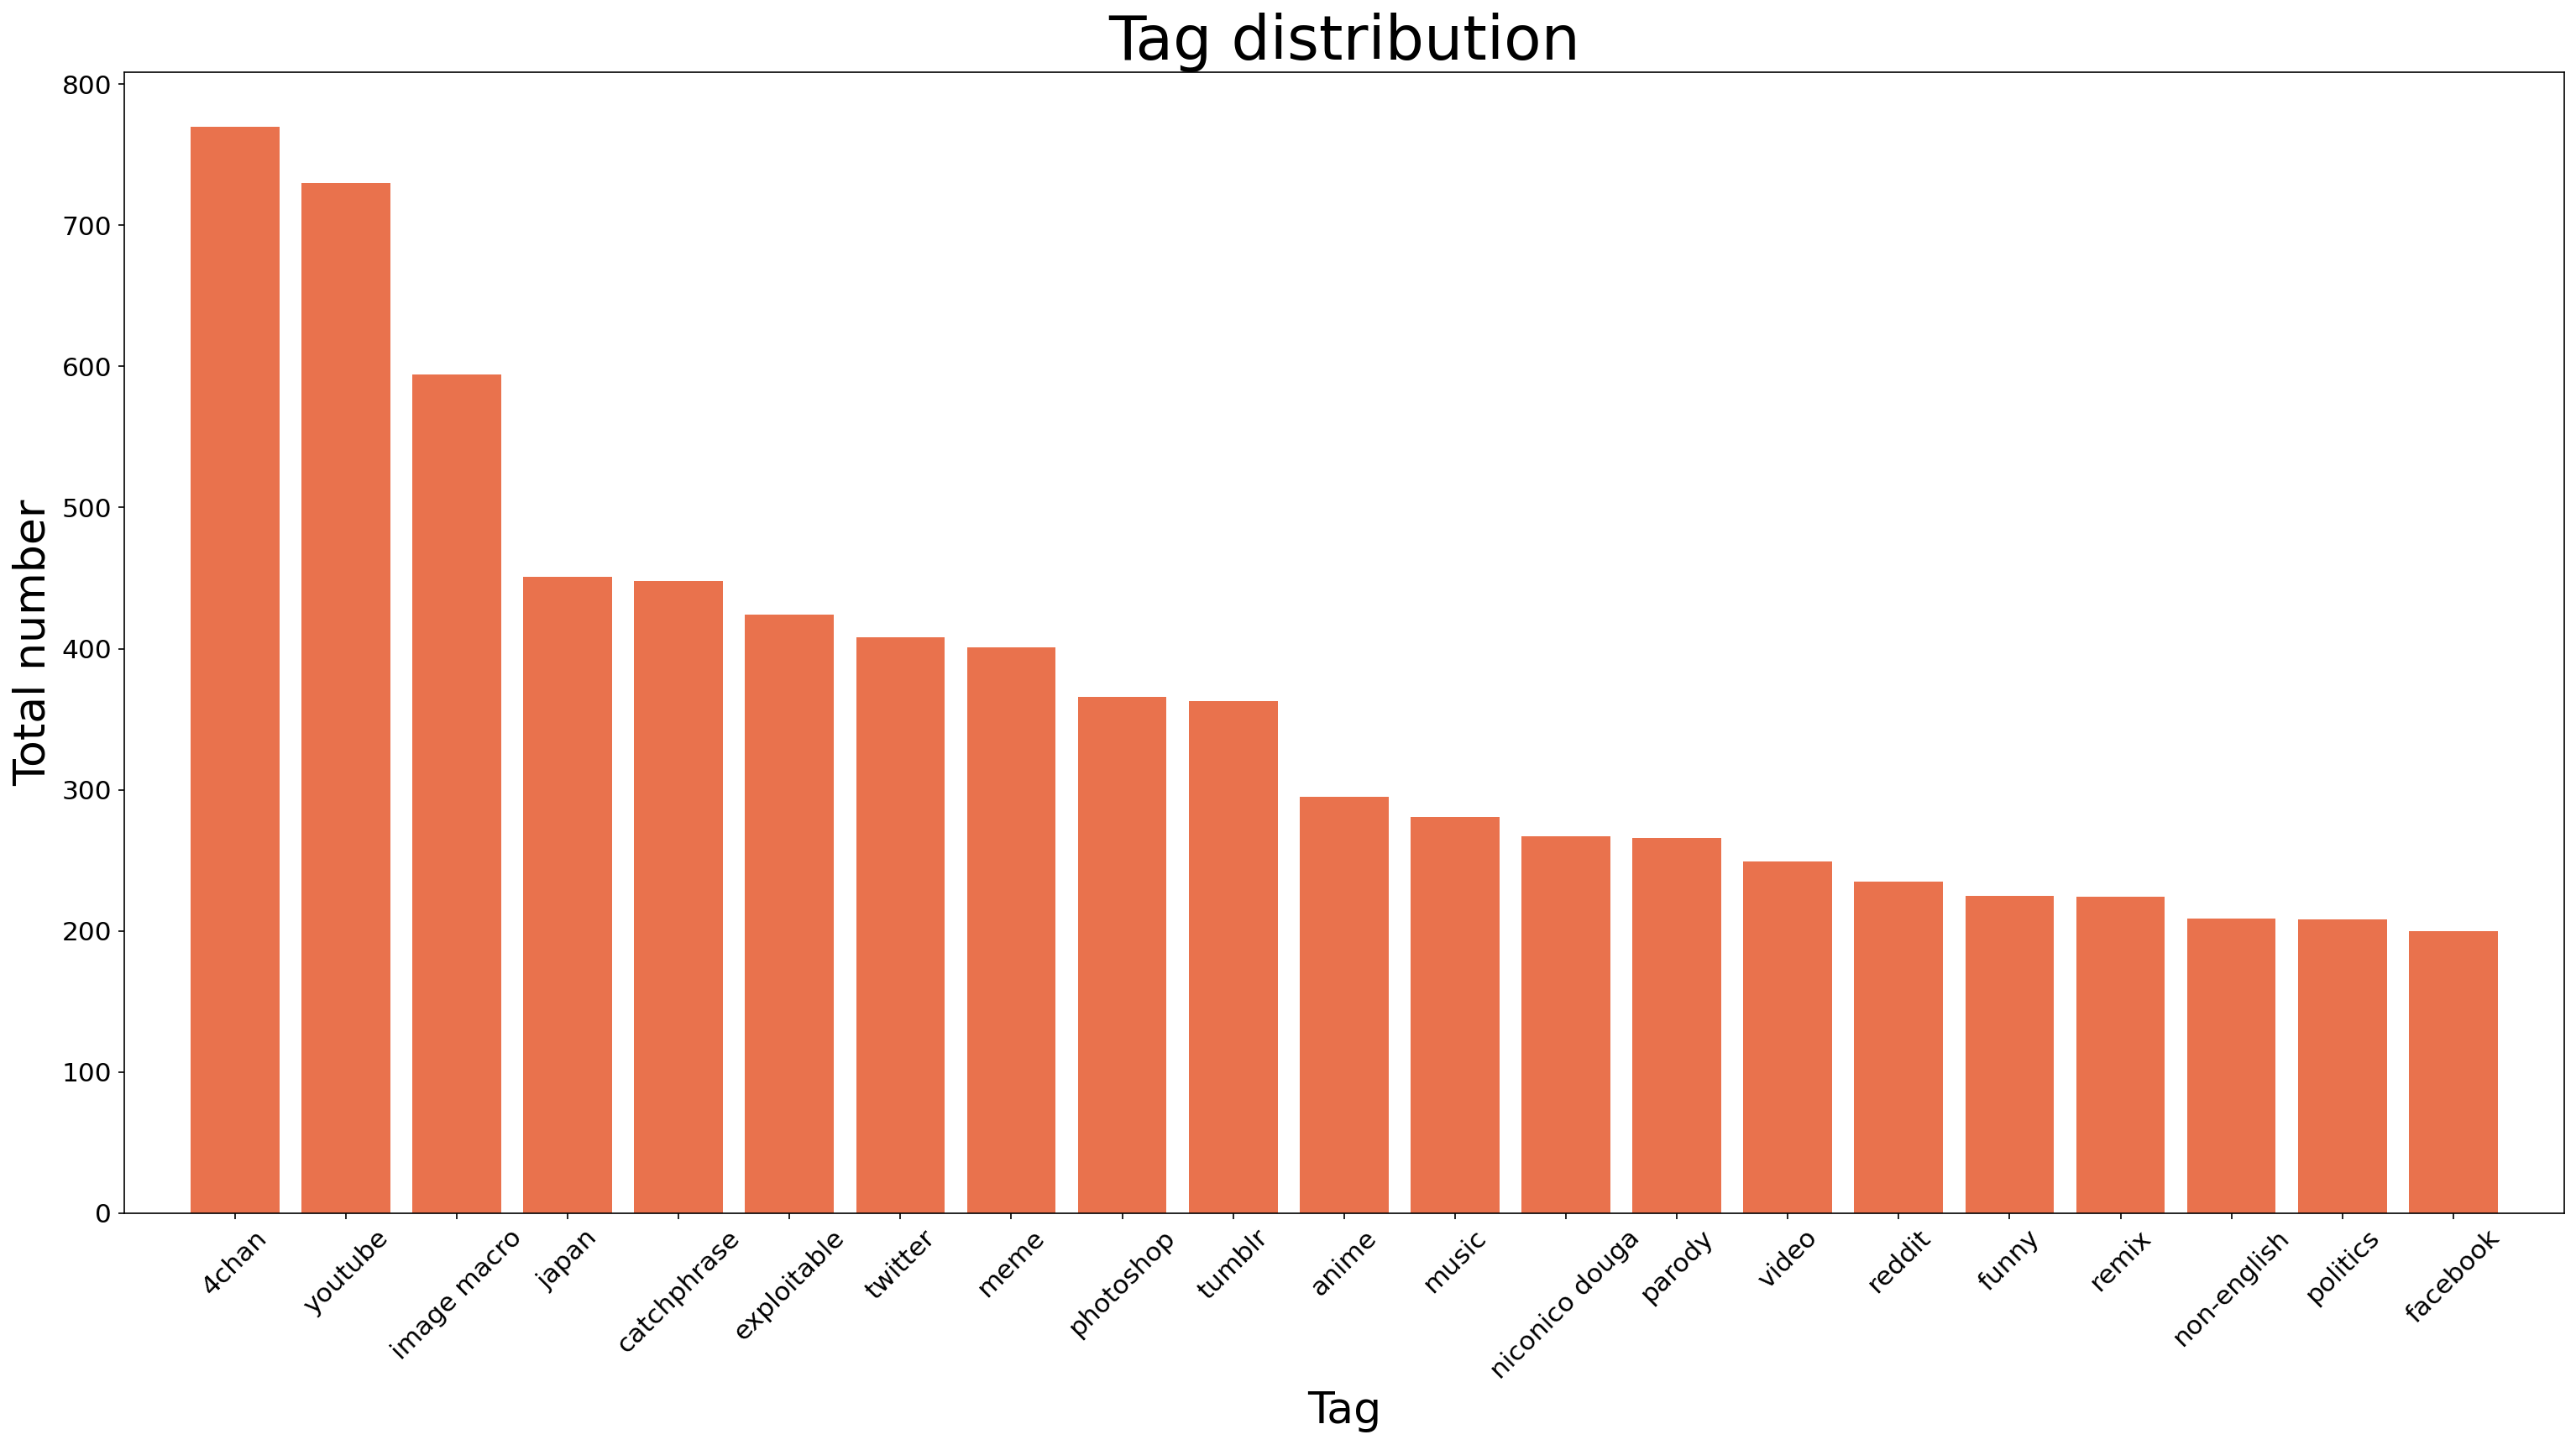

In [17]:
# Make frequency dictionary
data = memes

all_tags = []
missing = 0
for taglist in data["tags"]:
    for t in taglist:
        all_tags.append(t)
    if len(taglist) == 0:
        missing += 1
        
tags_freq = Counter(all_tags)
text = "TAGS is missing for {} memes out of {}. There are {} different tags. Showing only tags with >=3 occurrences. Remember: some memes have multiple tags."\
      .format(missing, len(data), len(tags_freq))


# Create bar plot
plot_data = dict(tags_freq.most_common())
plot_data = {key:value for key,value in plot_data.items() if value >= 200}
plt.bar(plot_data.keys(), plot_data.values(), color=hex3)
plt.ylabel('Total number', fontsize=medium_fontsize)
plt.xlabel('Tag', fontsize=medium_fontsize)
plt.title("Tag distribution", fontsize=large_fontsize)
plt.xticks(rotation = 45, fontsize=small_fontsize)
plt.yticks(fontsize=small_fontsize)
plt.xlim([-1,len(plot_data.keys())])
# plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/tags.png', bbox_inches='tight')
plt.show()